In [2]:
import pandas as pd

In [5]:
part1 = pd.read_csv("job_4_temperature_llama2-7b-result1.csv")
part2 = pd.read_csv("job_4_temperature_llama2-7b-result2.csv")
part2.columns = part1.columns
concatenated_result = pd.concat([part1, part2], ignore_index=True)

In [6]:
concatenated_result.sample(1)

,Unnamed: 0,temperature,model,ground_truth_response,prompt,full answer,generated_response,label,elapsed_time,timestamp
482,482,1.9,llama213b,They are spear-shaped,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,\n<s>[INST] <<SYS>>\n\nPlease strictly answer ...,Your question is too vague! Philodendron leave...,True,1.722605,2024-03-10 19:29:22


In [23]:
from utils import evaluate
from sklearn.preprocessing import MinMaxScaler

# concatenated_result = concatenated_result.drop(columns=["payload"])

ground_truth_responses = concatenated_result["ground_truth_response"].to_list()
generated_responses = concatenated_result["generated_response"].to_list()
concatenated_result = concatenated_result[
    concatenated_result["temperature"] != "temperature"
]
scores = evaluate.calculate_bleu_scores_smooth(
    ground_truth_responses, generated_responses
)
concatenated_result["BLEU"] = scores
concatenated_result["temperature"] = concatenated_result["temperature"].astype(float)
concatenated_result["cosine_similarity"] = concatenated_result[
    "cosine_similarity"
].astype(float)

concatenated_result["context_length"] = concatenated_result["context"].apply(len)
concatenated_result["question_length"] = concatenated_result["question"].apply(len)
concatenated_result["ground_truth_length"] = concatenated_result[
    "ground_truth_response"
].apply(len)

scaler = MinMaxScaler()
concatenated_result["normalized_context_length"] = scaler.fit_transform(
    concatenated_result[["context_length"]]
)
concatenated_result["normalized_question_length"] = scaler.fit_transform(
    concatenated_result[["question_length"]]
)
concatenated_result["normalized_ground_truth_length"] = scaler.fit_transform(
    concatenated_result[["ground_truth_length"]]
)

In [ ]:
from utils import evaluate
from sklearn.preprocessing import MinMaxScaler

# concatenated_result = concatenated_result.drop(columns=["payload"])

ground_truth_responses = concatenated_result["ground_truth_response"].to_list()
generated_responses = concatenated_result["generated_response"].to_list()
concatenated_result = concatenated_result[
    concatenated_result["temperature"] != "temperature"
]
scores = evaluate.calculate_bleu_scores_smooth(
    ground_truth_responses, generated_responses
)
concatenated_result["BLEU"] = scores
concatenated_result["temperature"] = concatenated_result["temperature"].astype(float)
concatenated_result["cosine_similarity"] = concatenated_result[
    "cosine_similarity"
].astype(float)

concatenated_result["context_length"] = concatenated_result["context"].apply(len)
concatenated_result["question_length"] = concatenated_result["question"].apply(len)
concatenated_result["ground_truth_length"] = concatenated_result[
    "ground_truth_response"
].apply(len)

scaler = MinMaxScaler()
concatenated_result["normalized_context_length"] = scaler.fit_transform(
    concatenated_result[["context_length"]]
)
concatenated_result["normalized_question_length"] = scaler.fit_transform(
    concatenated_result[["question_length"]]
)
concatenated_result["normalized_ground_truth_length"] = scaler.fit_transform(
    concatenated_result[["ground_truth_length"]]
)

/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/lujun/anaconda3/envs/causalLLM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

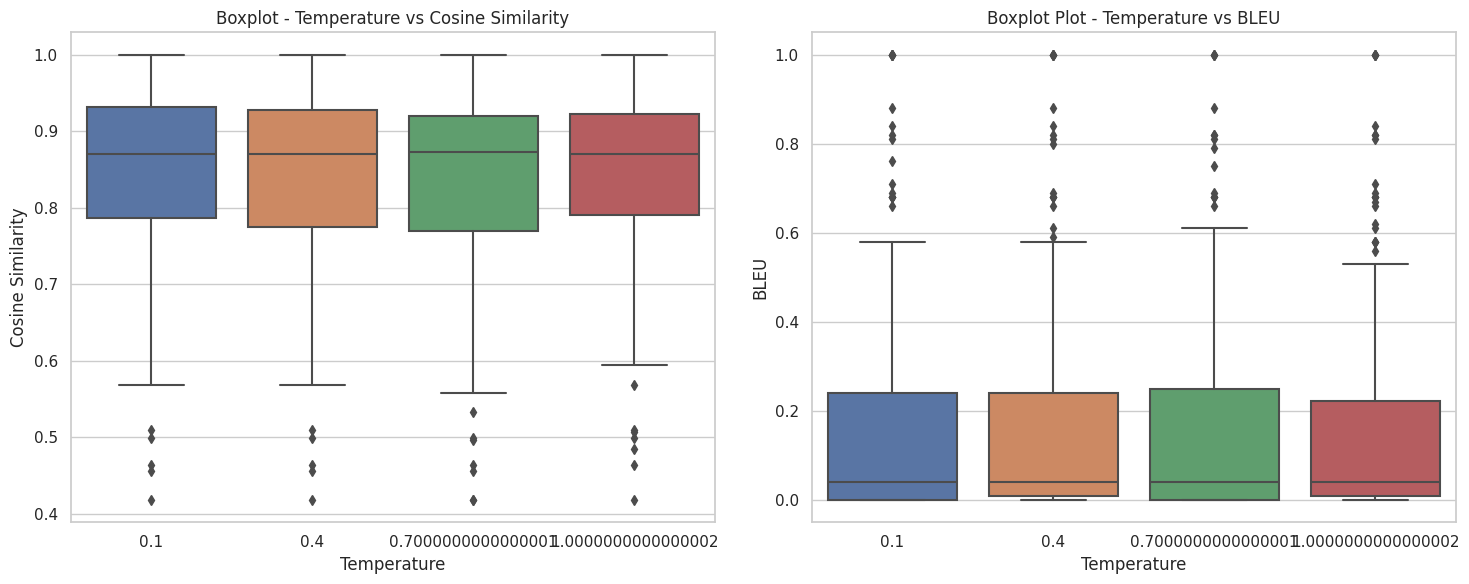

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Boxplot
sns.boxplot(
    x=concatenated_result["temperature"],
    y=concatenated_result["cosine_similarity"],
    ax=axes[0],
)
axes[0].set_title("Boxplot - Temperature vs Cosine Similarity")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Cosine Similarity")

# Scatter plot for BLEU
sns.boxplot(
    x=concatenated_result["temperature"],
    y=concatenated_result["BLEU"],
    ax=axes[1],
)
axes[1].set_title("Boxplot Plot - Temperature vs BLEU")
axes[1].set_xlabel("Temperature")
axes[1].set_ylabel("BLEU")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [25]:
concatenated_result.to_excel("result.xlsx")

In [ ]:
# Check 70b model
# Correct and detail understand image
# send email and explanation top priority  (Correct image)
# Undertand temerature check the possible temperatures
# Creativity perpelexity Temperature other one is creativity

In [ ]:
part1 = pd.read_csv("resource/temperature_results/final_result_part_1.csv")
part2 = pd.read_csv("resource/temperature_results/final_result_part_2.csv")
part2.columns = part1.columns
concatenated_result = pd.concat([part1, part2], ignore_index=True)

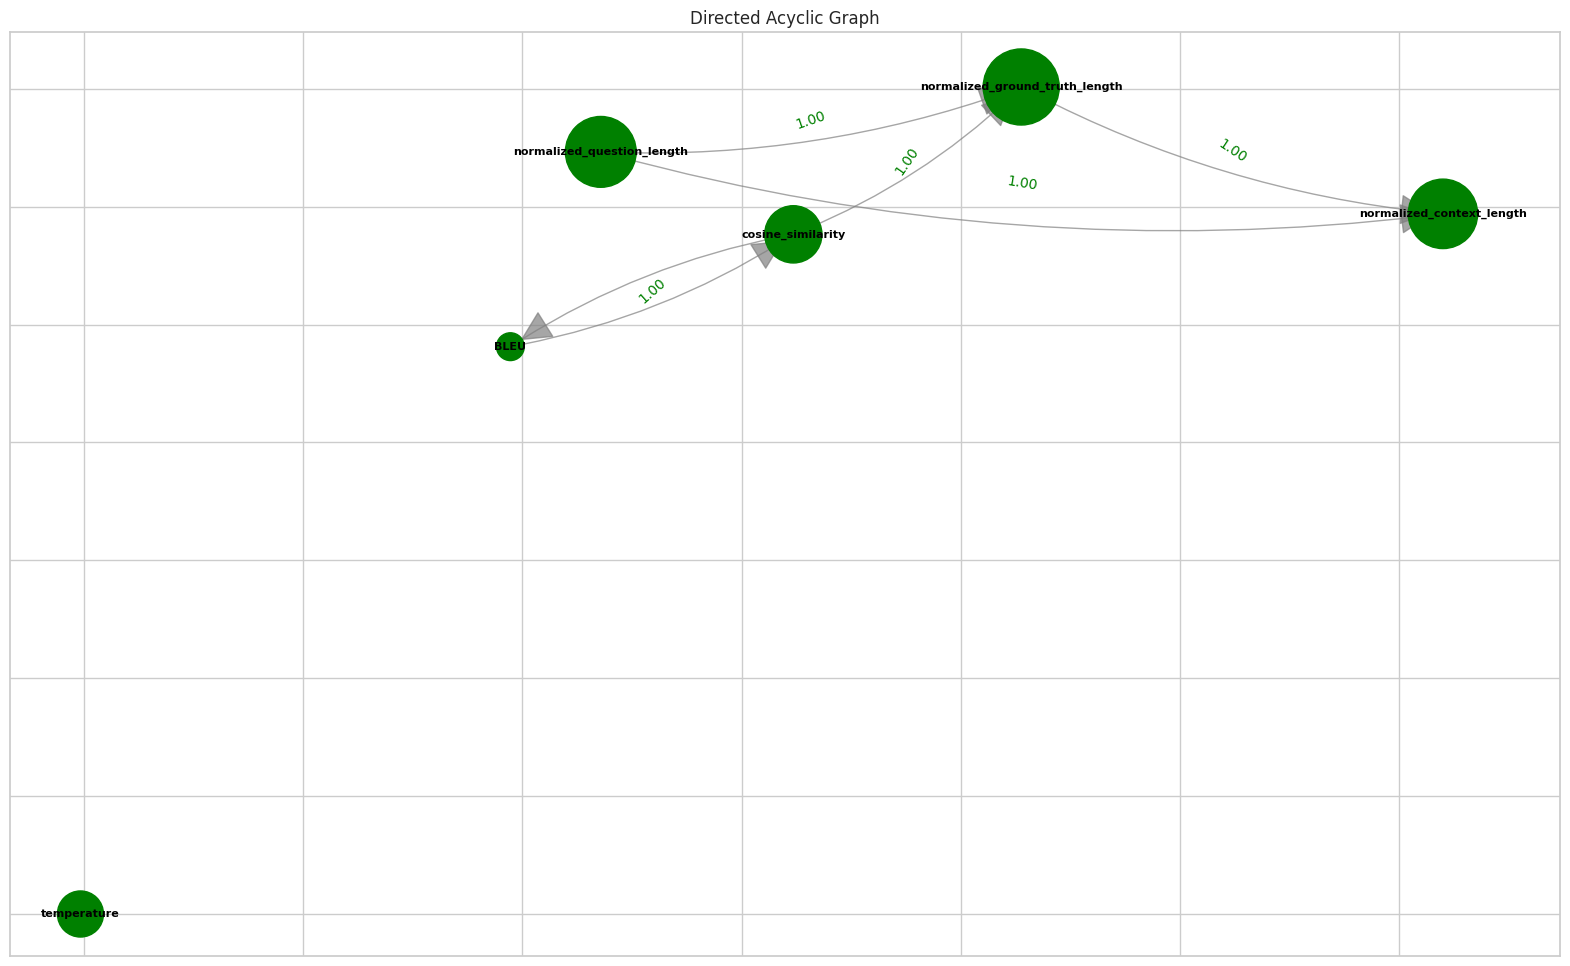

In [30]:
# PC constrain based
from castle.algorithms import DirectLiNGAM
from castle.datasets import load_dataset
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import load_dataset
from castle.algorithms import PC
from castle.algorithms.gradient.dag_gnn.torch import DAG_GNN
import networkx as nx


def plot_dag(graph, labels_node):
    pos = nx.spring_layout(graph)

    i = 0
    node_values = {}
    for node in graph.nodes:
        node_values[node] = labels_node[i]
        i = i + 1

    edge_weights = [graph.edges[edge]["weight"] for edge in graph.edges]

    node_size_factor = 100
    node_sizes = [node_size_factor * len(label) for label in labels_node]

    font_size = 8

    plt.figure(figsize=(20, 12))

    nx.draw_networkx_labels(
        graph,
        pos,
        labels=node_values,
        font_weight="bold",
        font_color="black",
        font_size=font_size,
    )
    edge_labels = {
        (edge[0], edge[1]): f"{graph.edges[edge]['weight']:.2f}" for edge in graph.edges
    }
    nx.draw_networkx_edge_labels(
        graph, pos, edge_labels=edge_labels, font_color="green"
    )
    nx.draw_networkx_edges(
        graph,
        pos,
        width=edge_weights,
        edge_color="gray",
        alpha=0.7,
        arrowsize=50,
        connectionstyle="arc3,rad=0.1",
    )
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color="Green")

    plt.title("Directed Acyclic Graph")
    plt.show()


pc = PC()
data = concatenated_result[
    [
        "temperature",
        "normalized_context_length",
        "normalized_question_length",
        "normalized_ground_truth_length",
        "cosine_similarity",
        "BLEU",
    ]
].to_numpy()

pc.learn(data)
predict_graph = nx.DiGraph(pc.causal_matrix, create_using=nx.DiGraph())

labels_node = [
    "temperature",
    "normalized_context_length",
    "normalized_question_length",
    "normalized_ground_truth_length",
    "cosine_similarity",
    "BLEU",
]
plot_dag(predict_graph, labels_node)

In [32]:
predict_graph.

OutEdgeView([(2, 1), (2, 3), (3, 1), (4, 3), (4, 5), (5, 4)])